In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Data for Normal test dataset
years = [2018, 2019, 2020, 2021, 2022, 2023]
normal_data = {
    "Baseline": [0.4655, 0.5143, 0.5315, 0.4691, 0.5321, None],
    "BERT_BASE_MNLI": [0.6207, 0.5714, 0.6667, 0.6914, 0.6788, None],
    "Legal_BERT": [0.5862, 0.5857, 0.5585, 0.5802, 0.6147, None],
    "RoBERTa_Base_MNLI": [0.5689, 0.6571, 0.6216, 0.716, 0.6697, None],
    "Electra_Base_MNLI": [0.6897, 0.5714, 0.6216, 0.679, 0.6605, None],
    "DeBERTa_base_NLI": [0.6724, 0.6571, 0.6486, 0.6543, 0.7248, None]
}

# Data for Hypothesis only test dataset
hypothesis_data = {
    "Baseline": [0.4655, 0.5143, 0.5315, 0.4691, 0.5321, None],
    "BERT_BASE_MNLI": [0.5517, 0.4714, 0.4595, 0.4691, 0.4677, None],
    "Legal_BERT": [0.4827, 0.4571, 0.4954, 0.4568, 0.4587, None],
    "RoBERTa_Base_MNLI": [0.5517, 0.4714, 0.4774, 0.4074, 0.4862, None],
    "Electra_Base_MNLI": [0.4828, 0.5571, 0.4865, 0.5432, 0.5138, None],
    "DeBERTa_base_NLI": [0.5345, 0.5143, 0.5045, 0.5185, 0.5321, None]
}



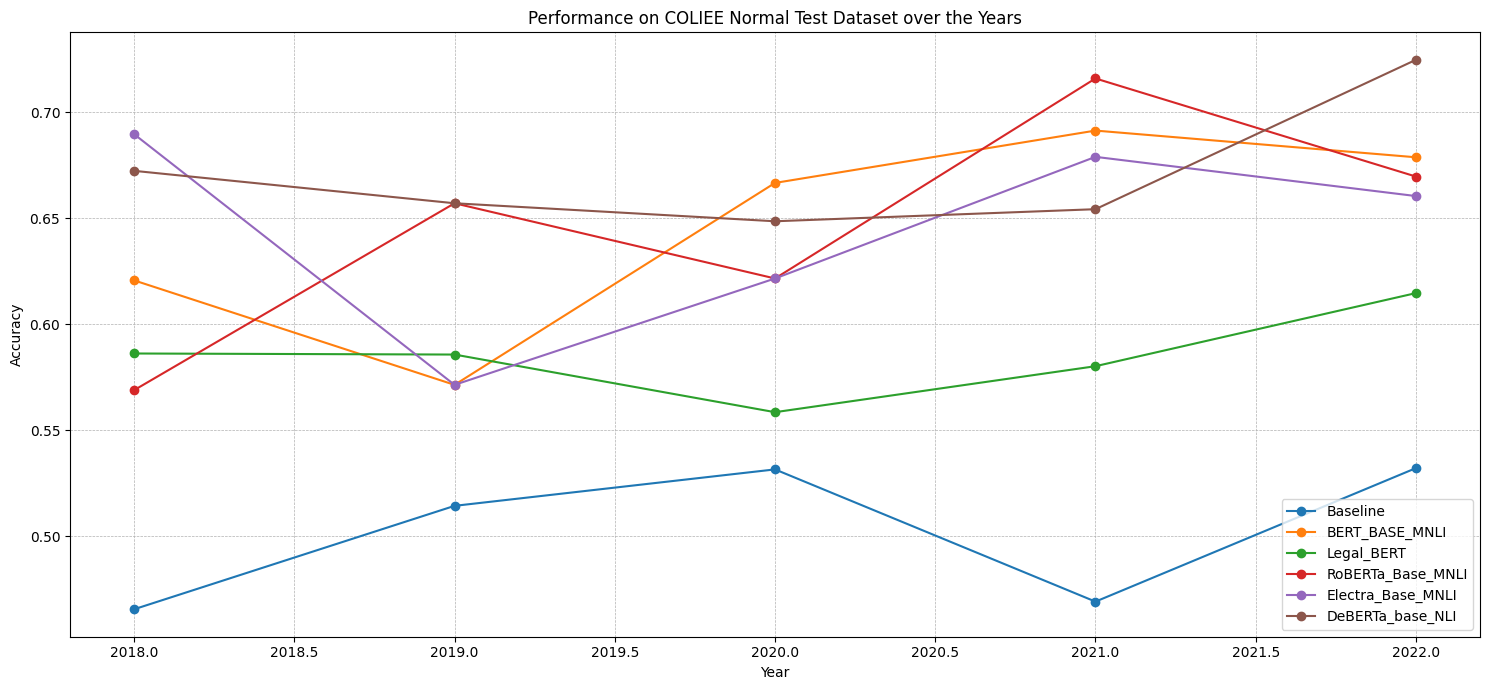

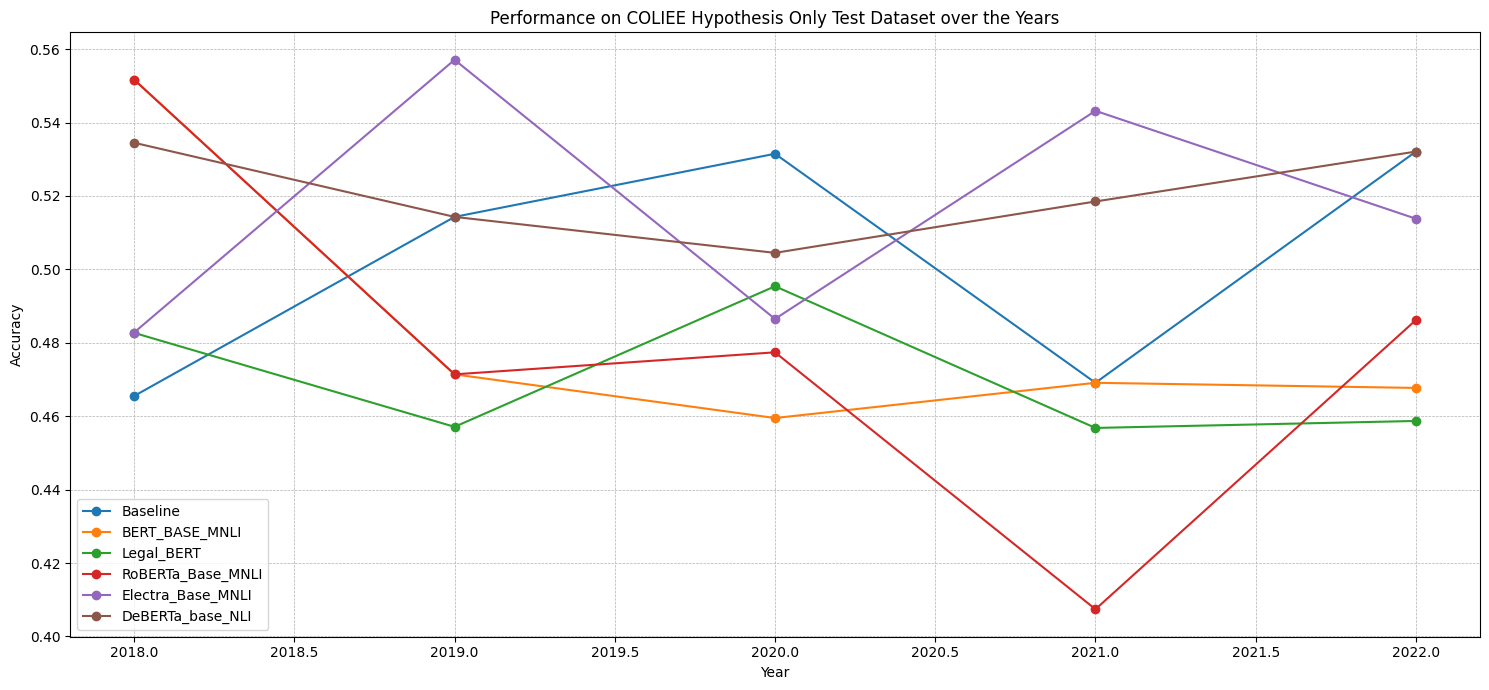

In [4]:
# Plotting line charts for Normal test dataset
plt.figure(figsize=(15, 7))
for model, accuracies in normal_data.items():
    plt.plot(years[:-1], accuracies[:-1], label=model, marker='o')
plt.title("Performance on COLIEE Normal Test Dataset over the Years")
plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plotting line charts for Hypothesis only test dataset
plt.figure(figsize=(15, 7))
for model, accuracies in hypothesis_data.items():
    plt.plot(years[:-1], accuracies[:-1], label=model, marker='o')
plt.title("Performance on COLIEE Hypothesis Only Test Dataset over the Years")
plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

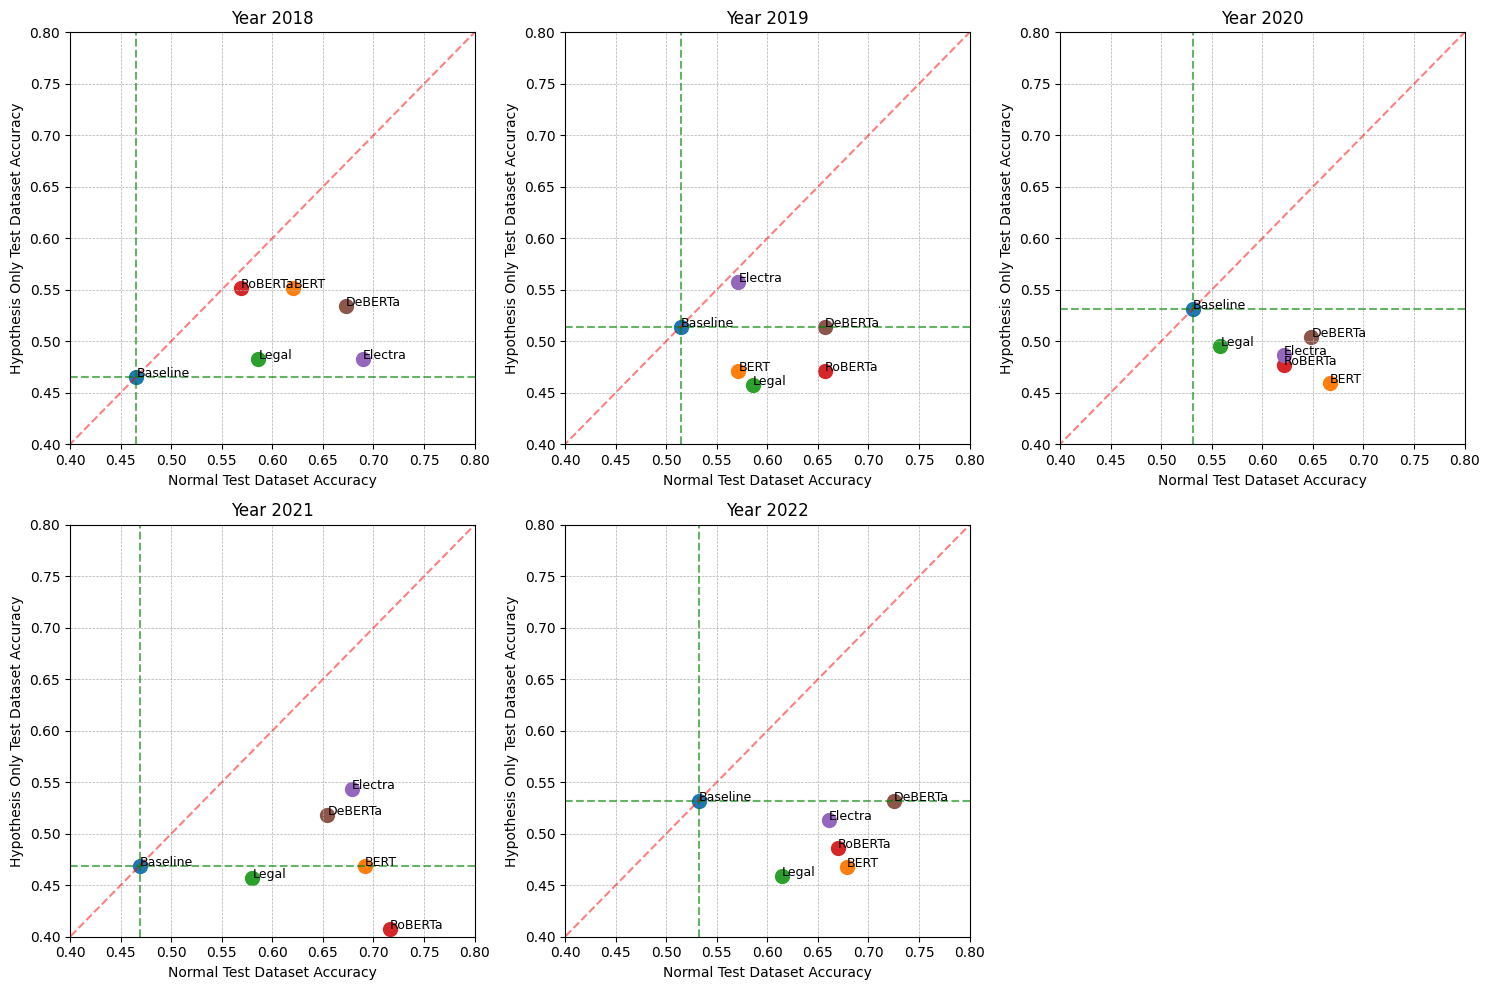

In [5]:
# Scatter plots comparing performance on the normal dataset vs. the hypothesis-only dataset with baseline intersections

plt.figure(figsize=(15, 10))

for year_idx, year in enumerate(years[:-1]):
    plt.subplot(2, 3, year_idx + 1)
    baseline_normal = normal_data["Baseline"][year_idx]
    baseline_hypothesis = hypothesis_data["Baseline"][year_idx]
    for model in normal_data:
        normal_accuracy = normal_data[model][year_idx]
        hypothesis_accuracy = hypothesis_data[model][year_idx]
        plt.scatter(normal_accuracy, hypothesis_accuracy, label=model, s=100)
        plt.text(normal_accuracy, hypothesis_accuracy, model.split('_')[0], fontsize=9)

    plt.axhline(y=baseline_hypothesis, color='g', linestyle='--', alpha=0.6)
    plt.axvline(x=baseline_normal, color='g', linestyle='--', alpha=0.6)
    
    plt.plot([0, 1], [0, 1], 'r--', alpha=0.5)  # Line of equality
    plt.title(f"Year {year}")
    plt.xlabel("Normal Test Dataset Accuracy")
    plt.ylabel("Hypothesis Only Test Dataset Accuracy")
    plt.xlim(0.4, 0.8)
    plt.ylim(0.4, 0.8)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

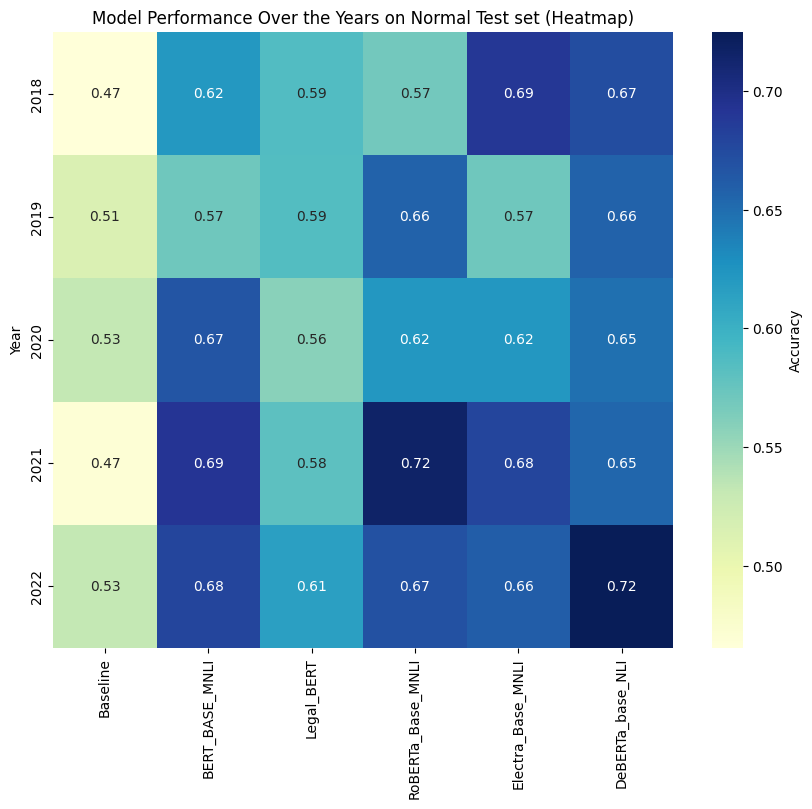

In [7]:
import seaborn as sns

# Preparing data for heatmap
heatmap_data = {model: values[:-1] for model, values in normal_data.items()}
heatmap_df = pd.DataFrame(heatmap_data, index=years[:-1])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Accuracy'})
plt.title("Model Performance Over the Years on Normal Test set (Heatmap)")
plt.ylabel("Year")
plt.show()


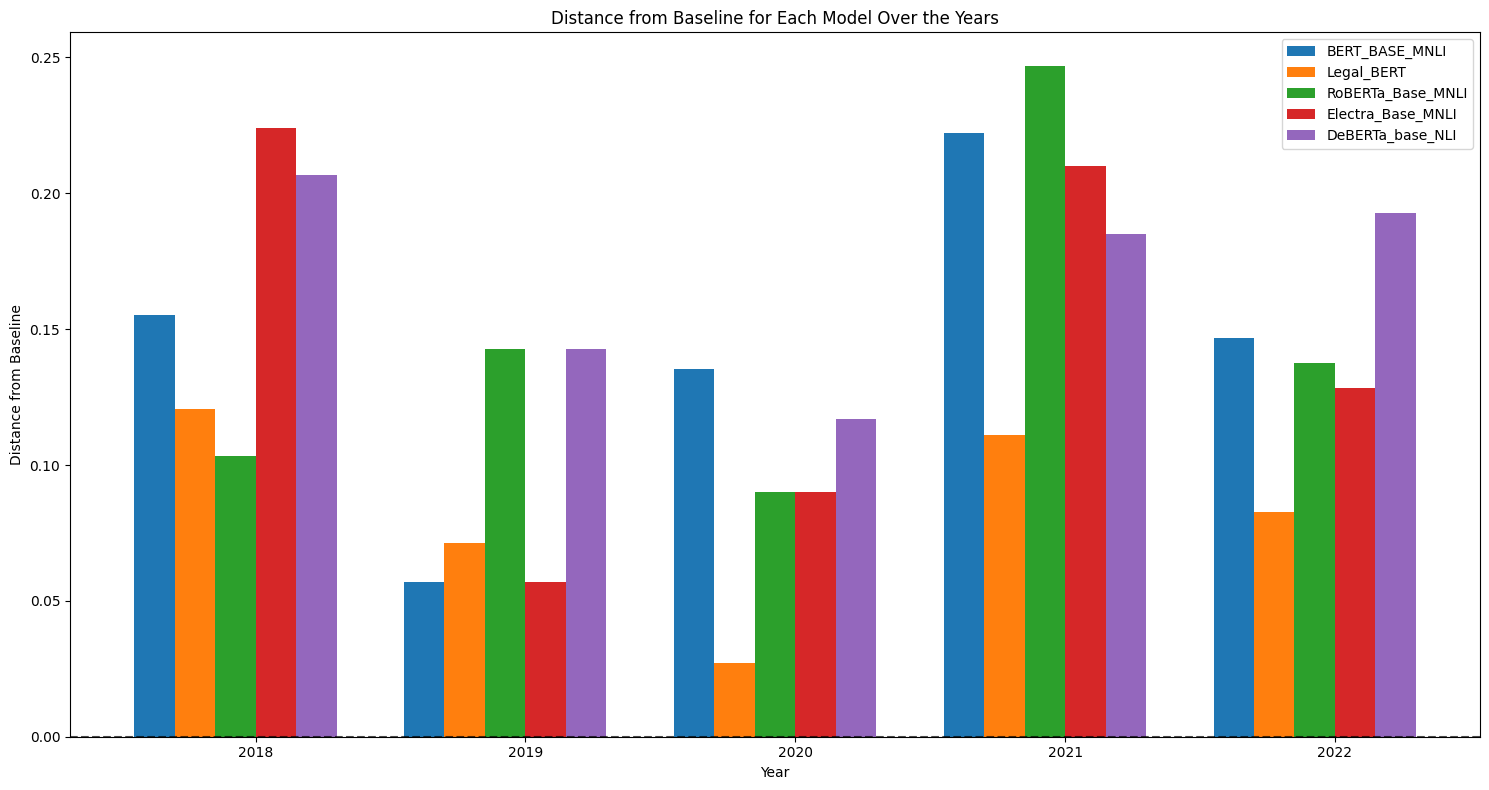

In [8]:
# Calculate distance from baseline for each model and year
distance_from_baseline = {}
baseline_values = normal_data["Baseline"]
for model in normal_data:
    if model != "Baseline":
        distance = [normal_data[model][i] - baseline_values[i] for i in range(len(years) - 1)]
        distance_from_baseline[model] = distance

# Plotting the Distance from Baseline bar chart
plt.figure(figsize=(15, 8))
width = 0.15
for idx, model in enumerate(distance_from_baseline):
    plt.bar([i + width * idx for i in range(len(years) - 1)], distance_from_baseline[model], width=width, label=model)

plt.axhline(0, color='black', linestyle='--', alpha=0.7)  # Zero line for reference
plt.xticks([i + width * 2.5 for i in range(len(years) - 1)], years[:-1])
plt.title("Distance from Baseline for Each Model Over the Years")
plt.xlabel("Year")
plt.ylabel("Distance from Baseline")
plt.legend()
plt.tight_layout()
plt.show()

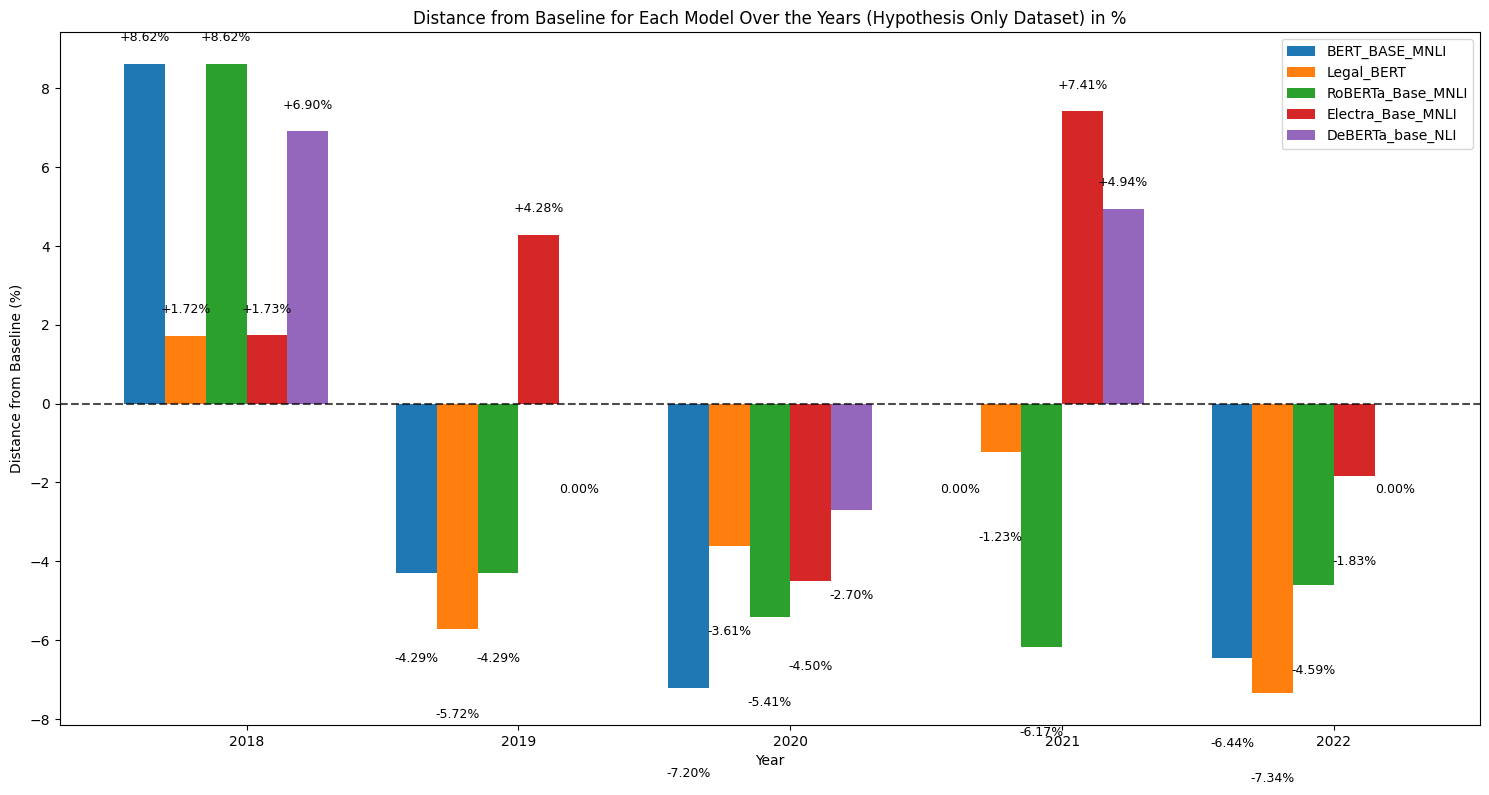

In [11]:
# Calculate distance from baseline for each model and year for the Hypothesis Only dataset
distance_from_baseline_hypothesis = {}
baseline_values_hypothesis = hypothesis_data["Baseline"]
for model in hypothesis_data:
    if model != "Baseline":
        distance = [hypothesis_data[model][i] - baseline_values_hypothesis[i] for i in range(len(years) - 1)]
        distance_from_baseline_hypothesis[model] = distance


# Convert distance from baseline to percentages for the Hypothesis Only dataset
distance_from_baseline_hypothesis_percentage = {model: [distance_value * 100 for distance_value in distance_list] 
                                                for model, distance_list in distance_from_baseline_hypothesis.items()}

# Plotting the Distance from Baseline bar chart for Hypothesis Only dataset with percentage values and differences annotated
plt.figure(figsize=(15, 8))
for idx, model in enumerate(distance_from_baseline_hypothesis_percentage):
    bars = plt.bar([i + width * idx for i in range(len(years) - 1)], 
                   distance_from_baseline_hypothesis_percentage[model], 
                   width=width, 
                   label=model)
    # Annotate the bars with the distance values
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"+{yval:.2f}%", ha='center', va='bottom', fontsize=9)
        else:
            plt.text(bar.get_x() + bar.get_width()/2, yval - 2, f"{yval:.2f}%", ha='center', va='top', fontsize=9)

plt.axhline(0, color='black', linestyle='--', alpha=0.7)  # Zero line for reference
plt.xticks([i + width * 2.5 for i in range(len(years) - 1)], years[:-1])
plt.title("Distance from Baseline for Each Model Over the Years (Hypothesis Only Dataset) in %")
plt.xlabel("Year")
plt.ylabel("Distance from Baseline (%)")
plt.legend()
plt.tight_layout()
plt.show()

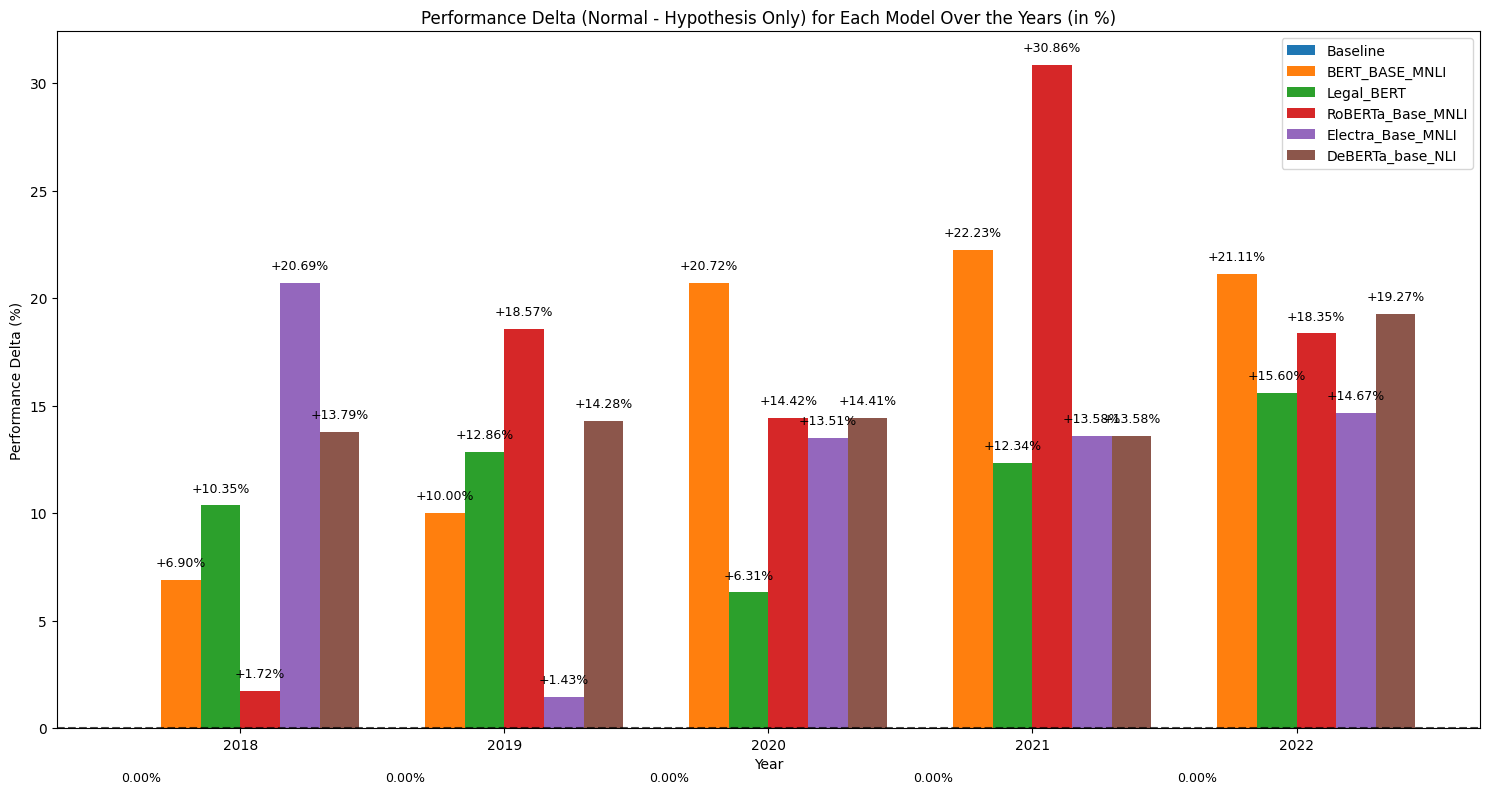

In [10]:
# Convert deltas to percentages
performance_delta = {}
for model in normal_data:
    delta = [normal_data[model][i] - hypothesis_data[model][i] for i in range(len(years) - 1)]
    performance_delta[model] = delta
performance_delta_percentage = {model: [delta_value * 100 for delta_value in delta_list] 
                               for model, delta_list in performance_delta.items()}

# Plotting the Performance Delta bar chart with percentage values and differences annotated
plt.figure(figsize=(15, 8))
for idx, model in enumerate(performance_delta_percentage):
    bars = plt.bar([i + width * idx for i in range(len(years) - 1)], 
                   performance_delta_percentage[model], 
                   width=width, 
                   label=model)
    # Annotate the bars with the delta values
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"+{yval:.2f}%", ha='center', va='bottom', fontsize=9)
        else:
            plt.text(bar.get_x() + bar.get_width()/2, yval - 2, f"{yval:.2f}%", ha='center', va='top', fontsize=9)

plt.axhline(0, color='black', linestyle='--', alpha=0.7)  # Zero line for reference
plt.xticks([i + width * 2.5 for i in range(len(years) - 1)], years[:-1])
plt.title("Performance Delta (Normal - Hypothesis Only) for Each Model Over the Years (in %)")
plt.xlabel("Year")
plt.ylabel("Performance Delta (%)")
plt.legend()
plt.tight_layout()
plt.show()